In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay


from google.colab import files

df=pd.read_csv('/content/Final_dataset.csv')

import warnings
warnings.filterwarnings("ignore")


In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Training set shape (after SMOTE):", X_train_smote.shape, y_train_smote.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape (after SMOTE): (6912, 17) (6912,)
Testing set shape: (1152, 17) (1152,)


In [ ]:
y_train_smote.head()

,Target
0,0
1,1
2,0
3,1
4,1


In [ ]:
df.shape

(5760, 18)

In [ ]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Cough_Breathing_Difficulty,Target
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1
4,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,1


# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=1, min_samples_split=2, random_state=5)
rf_model.fit(X_train_smote, y_train_smote)


y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.5104
Precision: 0.7404
Recall: 0.5347
F1 Score: 0.6210
AUC-ROC Score: 0.4861

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.44      0.31       288
           1       0.74      0.53      0.62       864

    accuracy                           0.51      1152
   macro avg       0.49      0.49      0.46      1152
weighted avg       0.61      0.51      0.54      1152



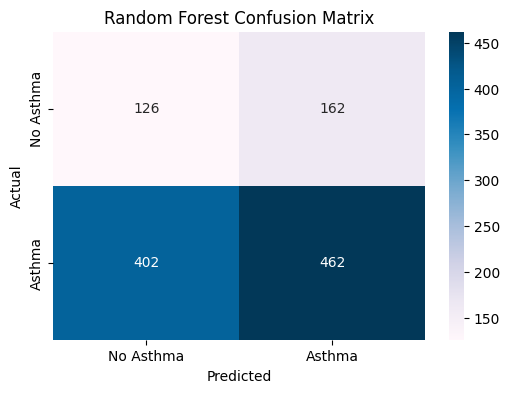

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


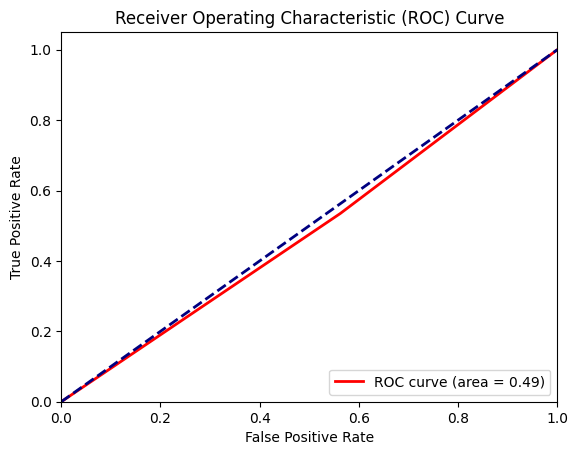

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

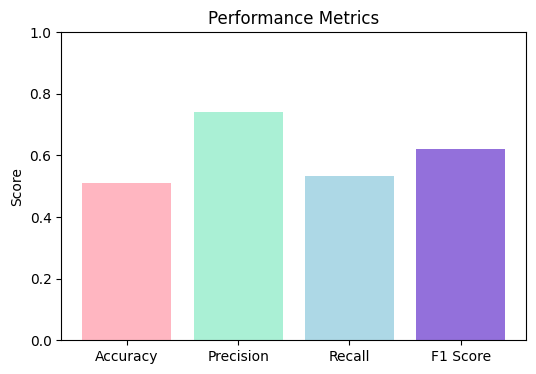

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=40)
gb_model.fit(X_train_smote, y_train_smote)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.4800
Precision: 0.7113
Recall: 0.5162
F1 Score: 0.5983
AUC-ROC Score: 0.4439

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.37      0.26       288
           1       0.71      0.52      0.60       864

    accuracy                           0.48      1152
   macro avg       0.46      0.44      0.43      1152
weighted avg       0.58      0.48      0.51      1152



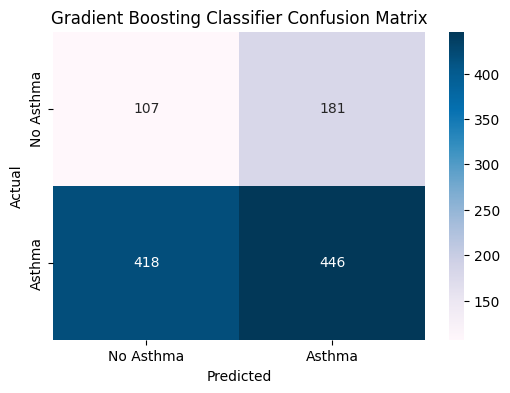

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

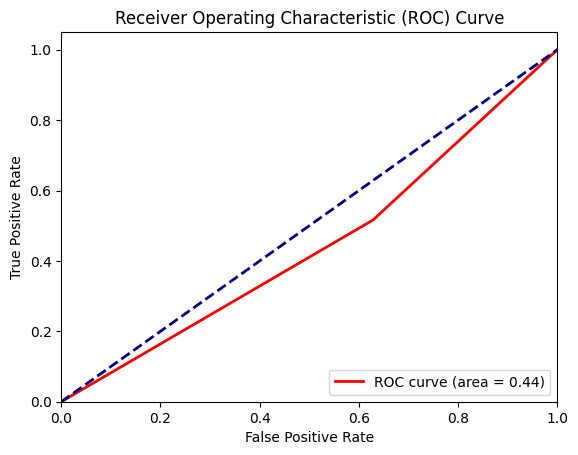

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

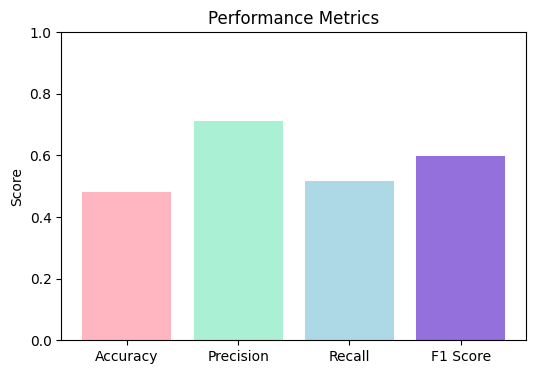

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# XGBoost

In [ ]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.3524
Precision: 0.5899
Recall: 0.4479
F1 Score: 0.5092
AUC-ROC Score: 0.2569

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.07      0.05       288
           1       0.59      0.45      0.51       864

    accuracy                           0.35      1152
   macro avg       0.31      0.26      0.28      1152
weighted avg       0.45      0.35      0.39      1152



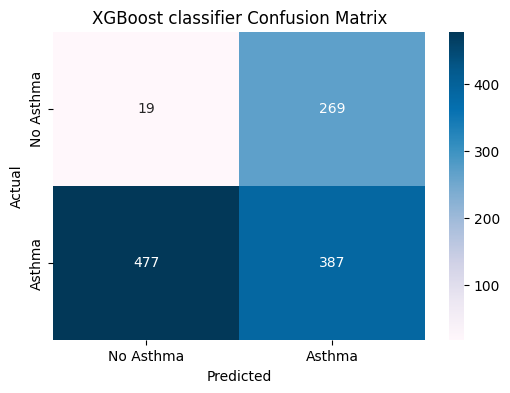

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('XGBoost classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

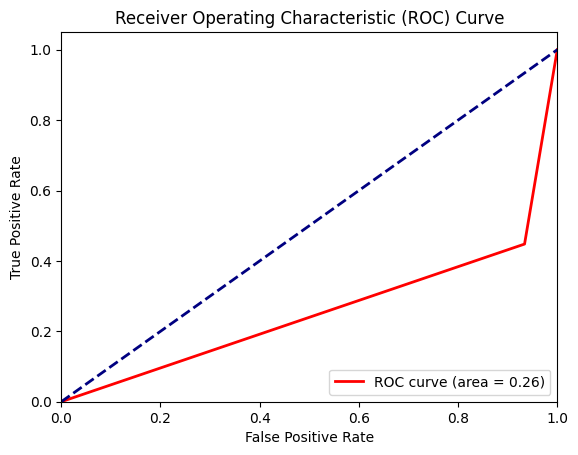

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

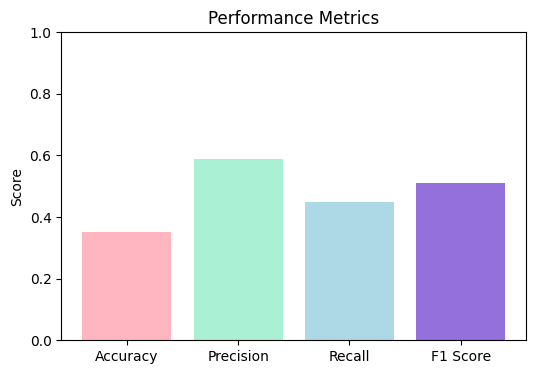

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# SVM classifier

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.5226
Precision: 0.7309
Recall: 0.5752
F1 Score: 0.6438
AUC-ROC Score: 0.4699

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.36      0.28       288
           1       0.73      0.58      0.64       864

    accuracy                           0.52      1152
   macro avg       0.48      0.47      0.46      1152
weighted avg       0.60      0.52      0.55      1152



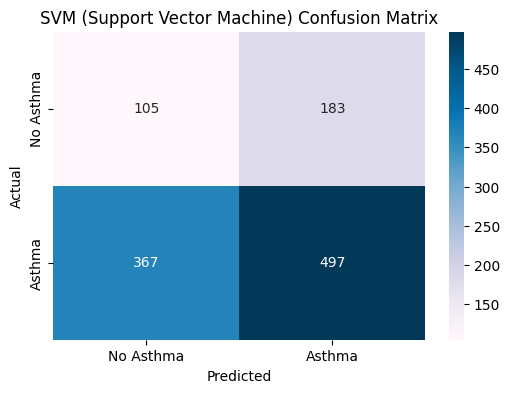

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('SVM (Support Vector Machine) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

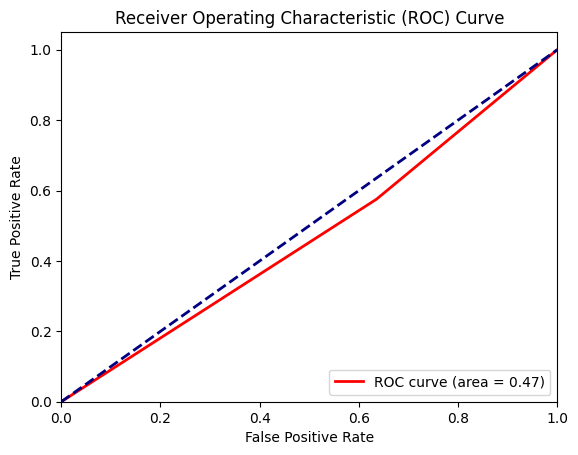

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

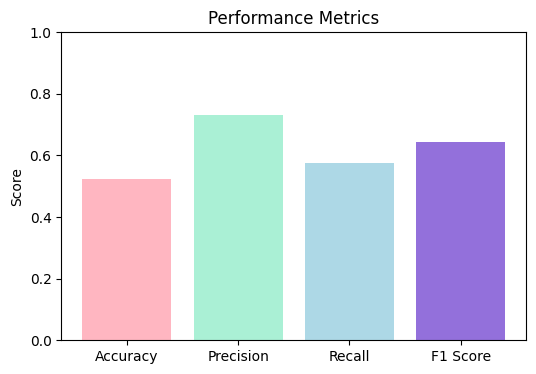

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.4592
Precision: 0.7140
Recall: 0.4653
F1 Score: 0.5634
AUC-ROC Score: 0.4531

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.44      0.29       288
           1       0.71      0.47      0.56       864

    accuracy                           0.46      1152
   macro avg       0.46      0.45      0.43      1152
weighted avg       0.59      0.46      0.49      1152



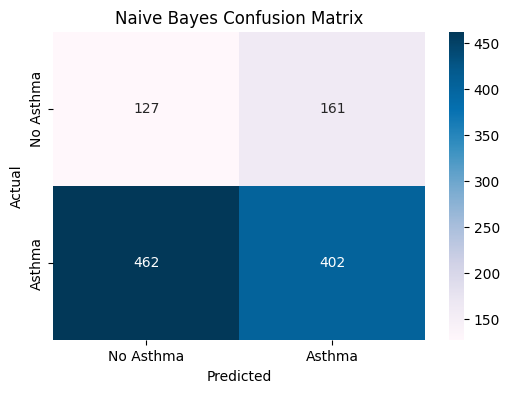

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

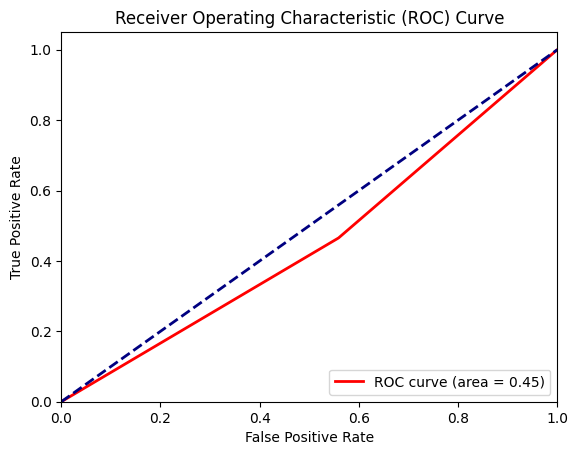

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

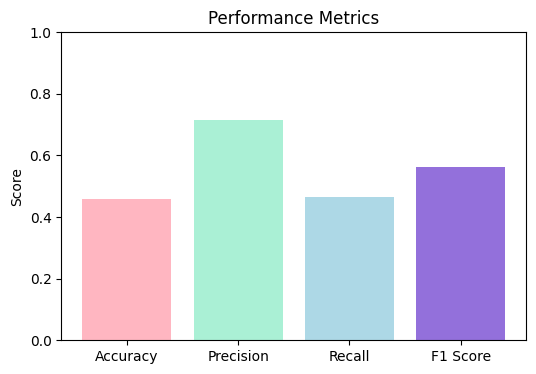

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# K-Nearest Neighbors (KNN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_smote, y_train_smote)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.5694
Precision: 0.6966
Recall: 0.7546
F1 Score: 0.7244
AUC-ROC Score: 0.3843

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.01      0.02       288
           1       0.70      0.75      0.72       864

    accuracy                           0.57      1152
   macro avg       0.36      0.38      0.37      1152
weighted avg       0.53      0.57      0.55      1152



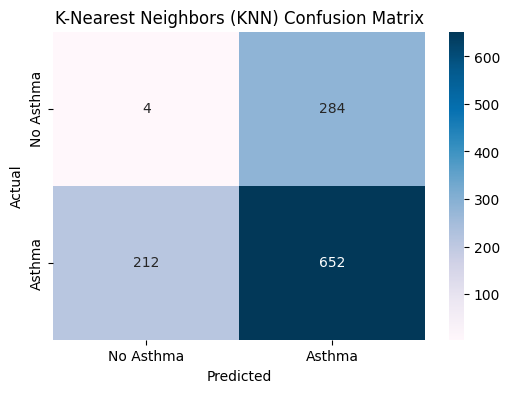

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

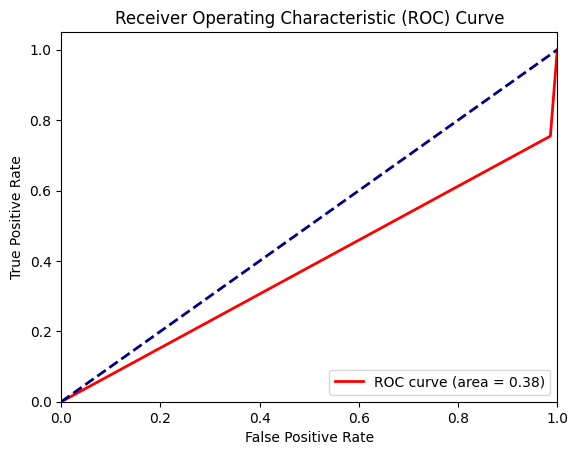

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

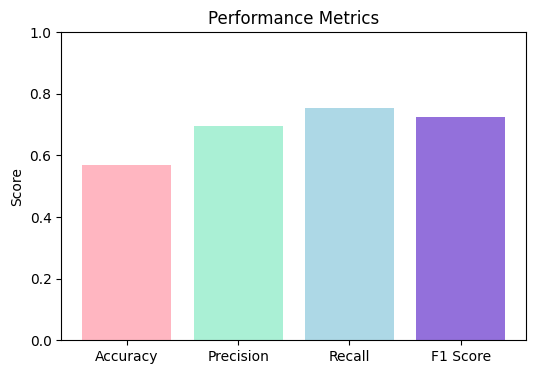

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train_smote, y_train_smote)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.2352
Precision: 0.4842
Recall: 0.3009
F1 Score: 0.3712
AUC-ROC Score: 0.1696

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.04      0.02       288
           1       0.48      0.30      0.37       864

    accuracy                           0.24      1152
   macro avg       0.25      0.17      0.20      1152
weighted avg       0.37      0.24      0.28      1152



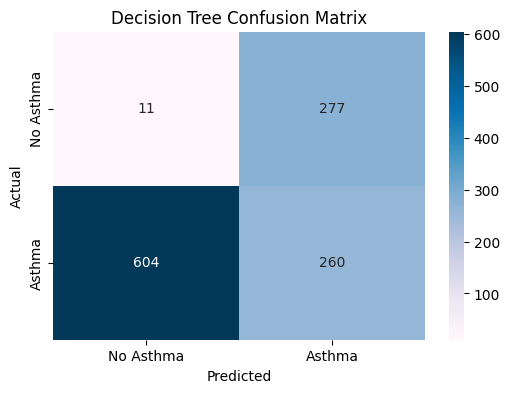

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

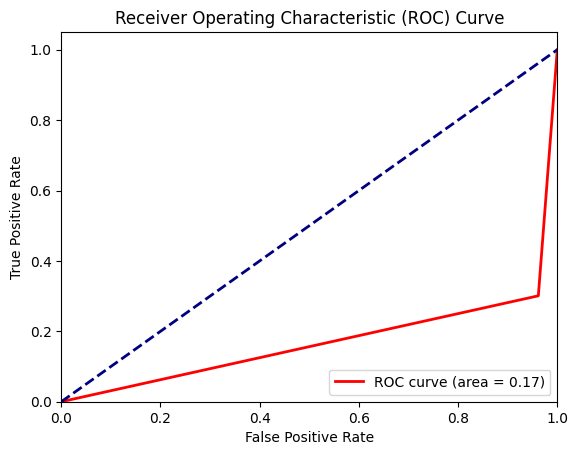

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

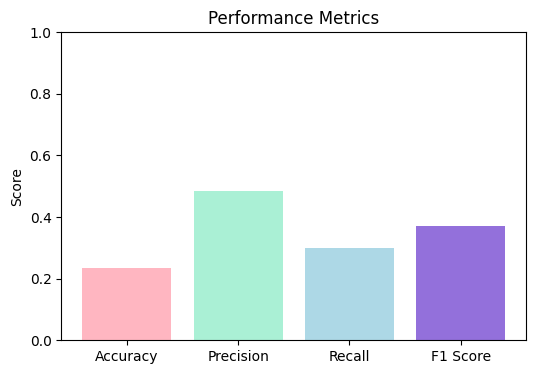

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Logistic Regression

In [ ]:
logreg_model = LogisticRegression(random_state=42, max_iter=50)
logreg_model.fit(X_train_smote, y_train_smote)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.5295
Precision: 0.7327
Recall: 0.5868
F1 Score: 0.6517
AUC-ROC Score: 0.4722

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.36      0.28       288
           1       0.73      0.59      0.65       864

    accuracy                           0.53      1152
   macro avg       0.48      0.47      0.46      1152
weighted avg       0.61      0.53      0.56      1152



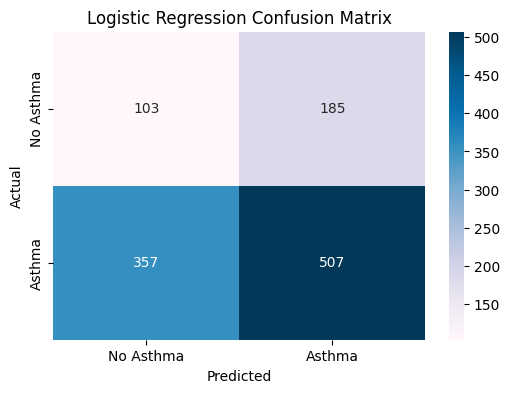

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

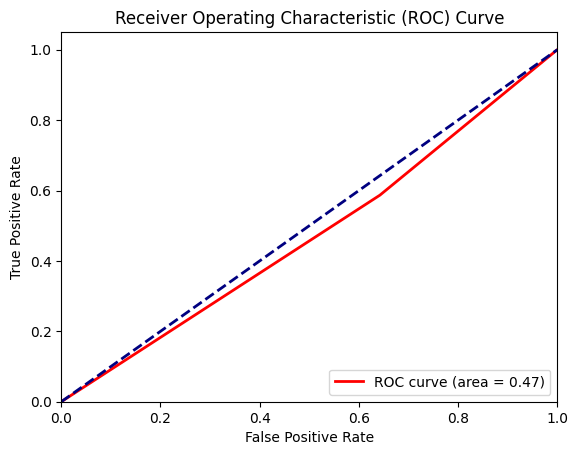

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

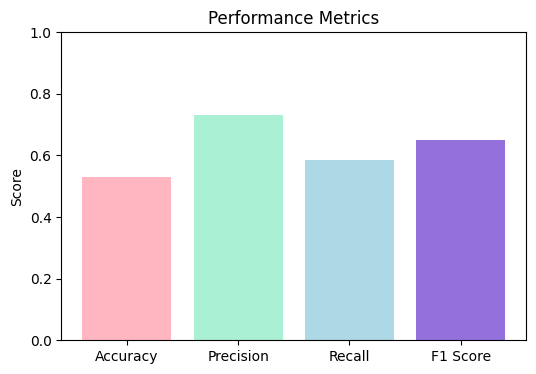

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for Hyperparameter Tuning

# Grid Search for Random Forest

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=5)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_rf_model = random_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters from Random Search: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}
Accuracy: 0.3672
Precision: 0.6000
Recall: 0.4688
F1 Score: 0.5263
AUC-ROC Score: 0.2656

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.06      0.05       288
           1       0.60      0.47      0.53       864

    accuracy                           0.37      1152
   macro avg       0.32      0.27      0.29      1152
weighted avg       0.46      0.37      0.41      1152



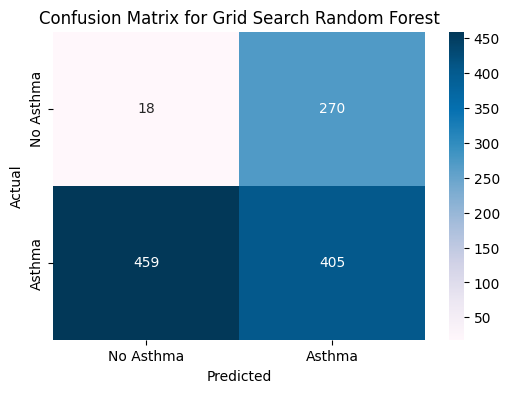

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

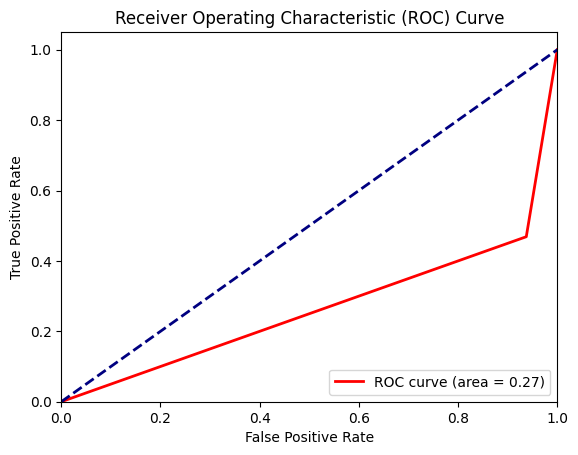

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

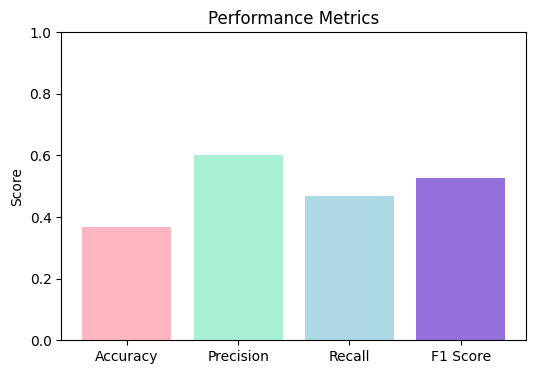

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for Gradient Boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'validation_fraction': [0.1, 0.15, 0.2],
    'n_iter_no_change': [None, 5, 10]
}

gb = GradientBoostingClassifier(random_state=40)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_gb_model = random_search.best_estimator_

y_pred = best_gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters from Random Search: {'validation_fraction': 0.15, 'subsample': 1.0, 'n_iter_no_change': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'loss': 'exponential', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}
Accuracy: 0.5304
Precision: 0.7284
Recall: 0.5961
F1 Score: 0.6556
AUC-ROC Score: 0.4647

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.33      0.26       288
           1       0.73      0.60      0.66       864

    accuracy                           0.53      1152
   macro avg       0.47      0.46      0.46      1152
weighted avg       0.60      0.53      0.56      1152



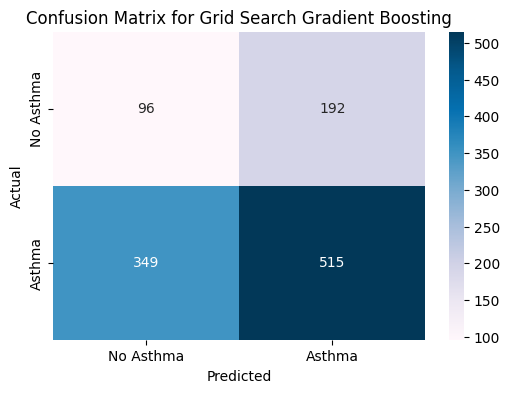

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

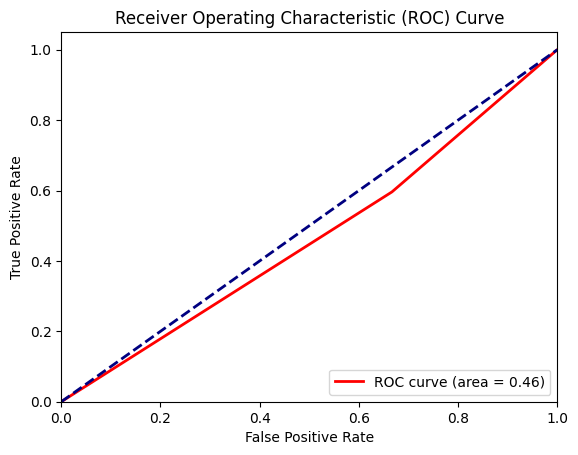

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

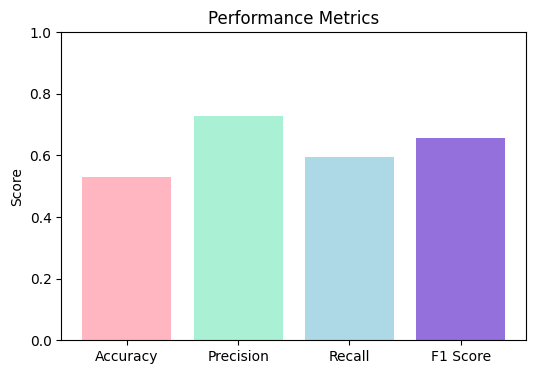

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for XG Boost



In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bynode': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.01, 0.1, 1, 10, 50],
    'reg_lambda': [0, 0.01, 0.1, 1, 10, 50]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_xgb_model = random_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters from Random Search: {'subsample': 0.6, 'scale_pos_weight': 5, 'reg_lambda': 1, 'reg_alpha': 10, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6, 'colsample_bynode': 0.7, 'colsample_bylevel': 0.7}
Accuracy: 0.7500
Precision: 0.7500
Recall: 1.0000
F1 Score: 0.8571
AUC-ROC Score: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       288
           1       0.75      1.00      0.86       864

    accuracy                           0.75      1152
   macro avg       0.38      0.50      0.43      1152
weighted avg       0.56      0.75      0.64      1152



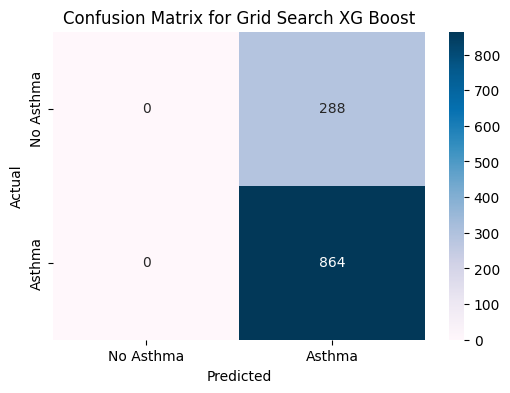

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search XG Boost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

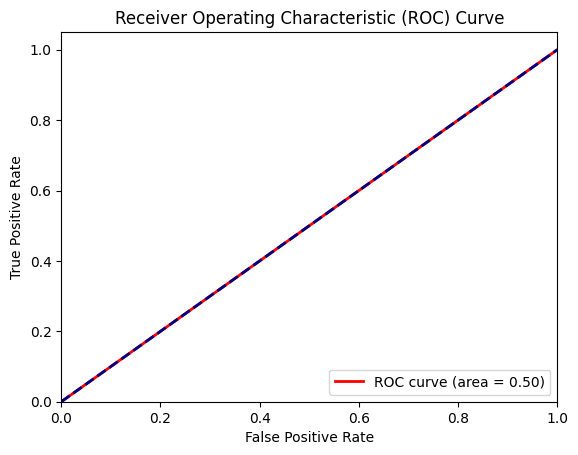

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

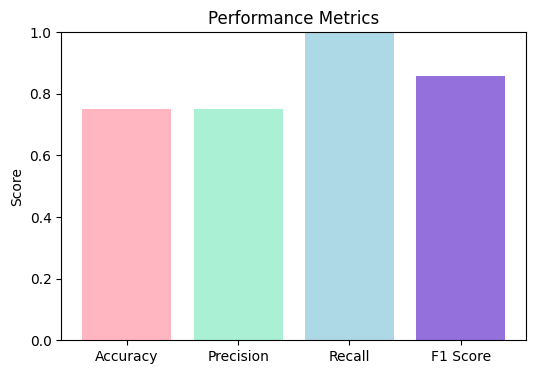

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for SVM classifier

In [ ]:
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'cache_size': [200, 500, 1000],
    'class_weight': [None, 'balanced'],
    'verbose': [False],
    'max_iter': [-1, 1000, 2000],
    'decision_function_shape': ['ovo', 'ovr'],
    'break_ties': [True, False]
}

svm = SVC(random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_svm_model = random_search.best_estimator_

y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters from Random Search: {'verbose': False, 'tol': 0.0001, 'shrinking': False, 'probability': False, 'max_iter': 2000, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'decision_function_shape': 'ovo', 'coef0': 0.5, 'class_weight': 'balanced', 'cache_size': 1000, 'break_ties': False, 'C': 0.1}
Accuracy: 0.4557
Precision: 0.7190
Recall: 0.4502
F1 Score: 0.5537
AUC-ROC Score: 0.4612

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.47      0.30       288
           1       0.72      0.45      0.55       864

    accuracy                           0.46      1152
   macro avg       0.47      0.46      0.43      1152
weighted avg       0.59      0.46      0.49      1152



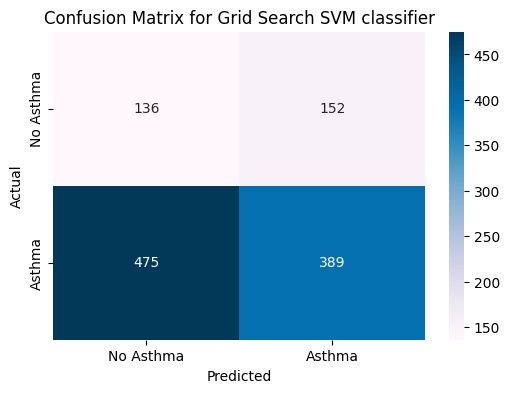

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search SVM classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

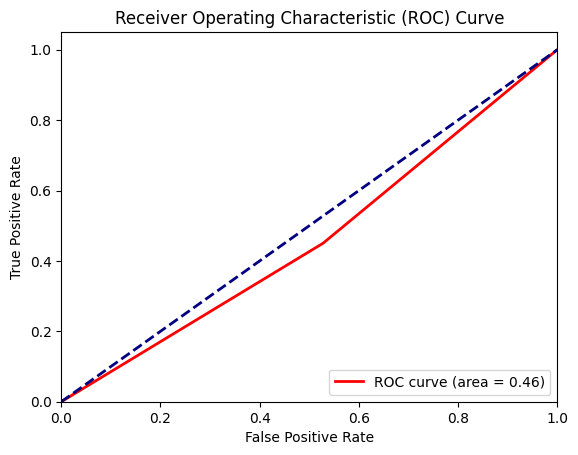

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

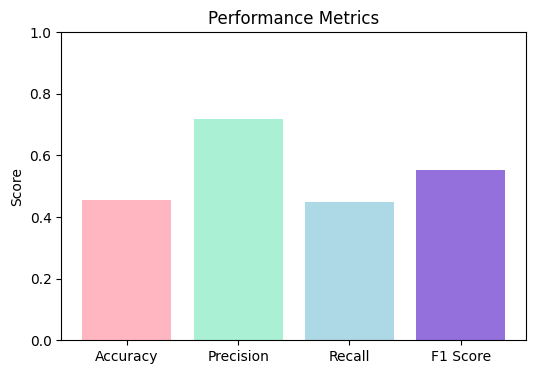

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for Naive Bayes

In [ ]:
param_dist = {
    'var_smoothing': np.logspace(-12, -6, num=100),
    'priors': [None]
}

nb = GaussianNB()

random_search = RandomizedSearchCV(
    estimator=nb,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_nb_model = random_search.best_estimator_

y_pred = best_nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters from Random Search: {'var_smoothing': 1e-12, 'priors': None}
Accuracy: 0.4592
Precision: 0.7140
Recall: 0.4653
F1 Score: 0.5634
AUC-ROC Score: 0.4531

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.44      0.29       288
           1       0.71      0.47      0.56       864

    accuracy                           0.46      1152
   macro avg       0.46      0.45      0.43      1152
weighted avg       0.59      0.46      0.49      1152



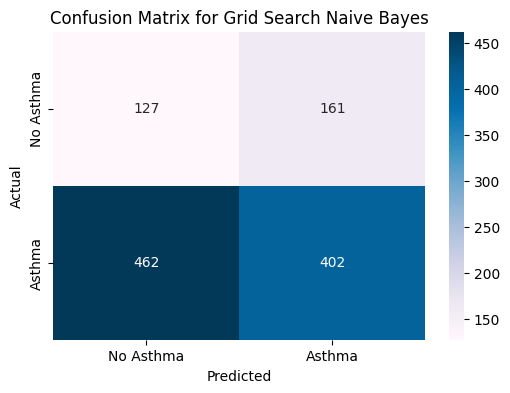

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

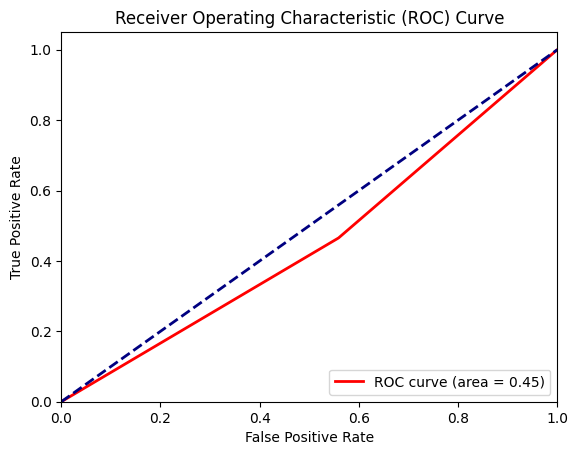

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

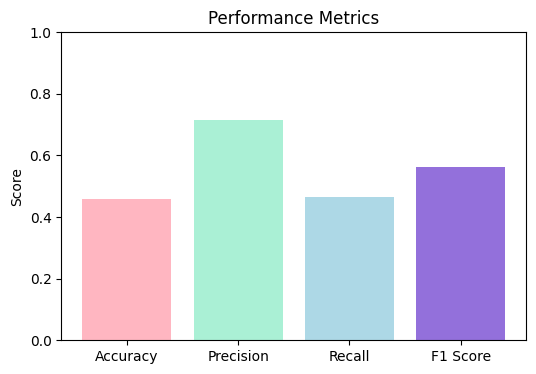

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for K-Nearest Neighbors (KNN)

In [ ]:
param_dist = {
    'n_neighbors': np.arange(1, 31, 1),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(10, 101, 10),
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_knn_model = random_search.best_estimator_

y_pred = best_knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters from Random Search: {'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'n_jobs': -1, 'metric': 'minkowski', 'leaf_size': 40, 'algorithm': 'kd_tree'}
Accuracy: 0.5208
Precision: 0.6777
Recall: 0.6887
F1 Score: 0.6831
AUC-ROC Score: 0.3530

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       288
           1       0.68      0.69      0.68       864

    accuracy                           0.52      1152
   macro avg       0.35      0.35      0.35      1152
weighted avg       0.51      0.52      0.52      1152



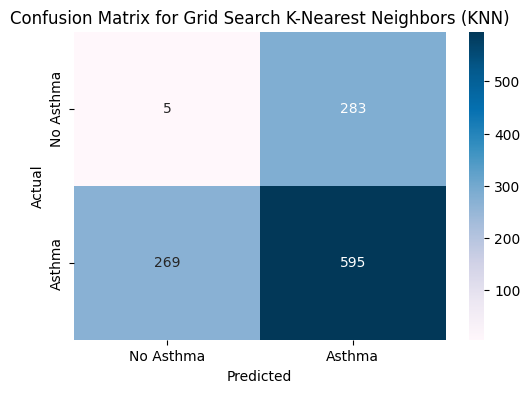

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

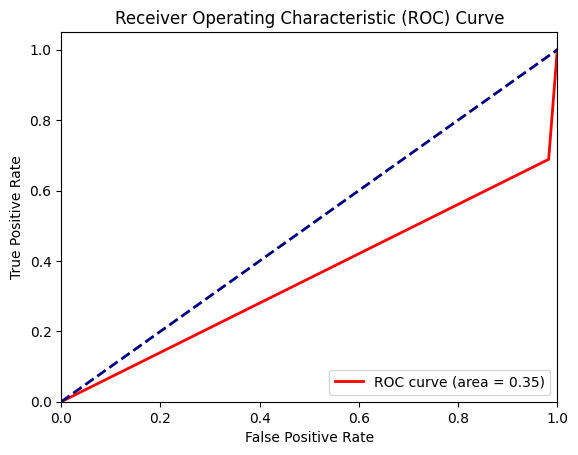

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

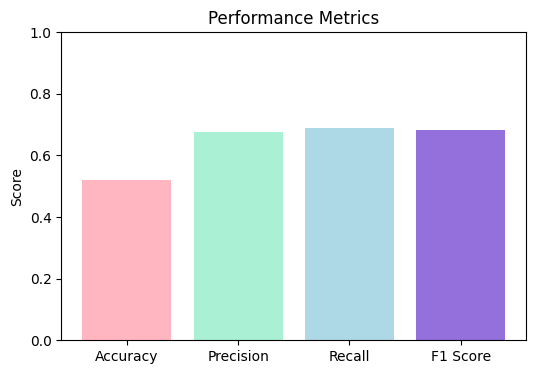

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for Decision Tree

In [ ]:
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 31, 1),
    'min_samples_split': np.arange(2, 21, 1),
    'min_samples_leaf': np.arange(1, 21, 1),
    'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': np.arange(2, 101, 10),
    'min_impurity_decrease': np.linspace(0.0, 0.5, 10),
    'class_weight': [None, 'balanced'],
    'ccp_alpha': np.linspace(0.0, 0.1, 10)
}

dt = DecisionTreeClassifier(random_state=40)

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_dt_model = random_search.best_estimator_

y_pred = best_dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters from Random Search: {'splitter': 'random', 'min_weight_fraction_leaf': 0.16666666666666666, 'min_samples_split': 8, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.4444444444444444, 'max_leaf_nodes': 42, 'max_features': 'sqrt', 'max_depth': 16, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.06666666666666667}
Accuracy: 0.2500
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC Score: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       288
           1       0.00      0.00      0.00       864

    accuracy                           0.25      1152
   macro avg       0.12      0.50      0.20      1152
weighted avg       0.06      0.25      0.10      1152



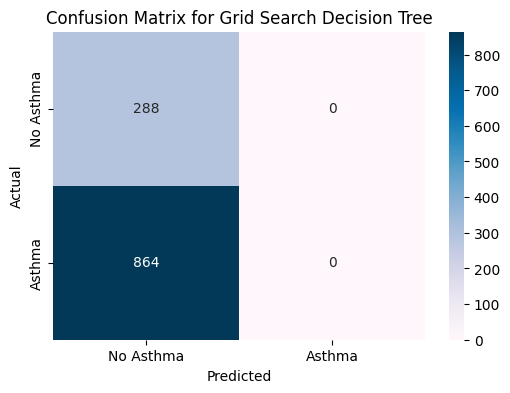

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

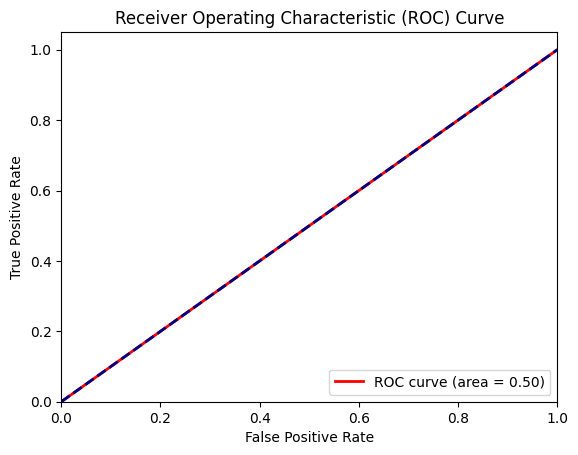

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

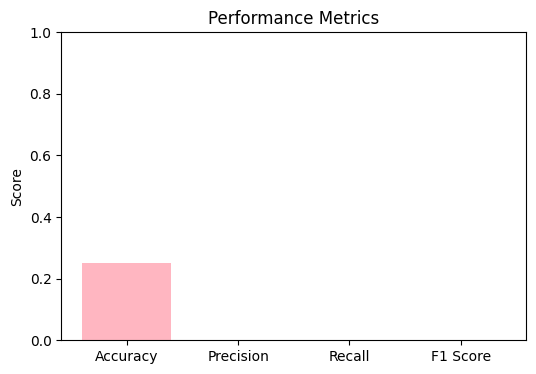

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for Logistic Regression

In [ ]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [False, True],
    'tol': [1e-4, 1e-3, 1e-2],
    'C': np.logspace(-4, 4, 20),
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'class_weight': [None, 'balanced'],
    'l1_ratio': np.linspace(0, 1, 10)
}

logreg = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_logreg_model = random_search.best_estimator_

y_pred = best_logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters from Random Search: {'tol': 0.001, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 100, 'l1_ratio': 0.1111111111111111, 'fit_intercept': False, 'dual': False, 'class_weight': None, 'C': 0.00026366508987303583}
Accuracy: 0.7309
Precision: 0.7464
Recall: 0.9711
F1 Score: 0.8441
AUC-ROC Score: 0.4907

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.01      0.02       288
           1       0.75      0.97      0.84       864

    accuracy                           0.73      1152
   macro avg       0.43      0.49      0.43      1152
weighted avg       0.59      0.73      0.64      1152



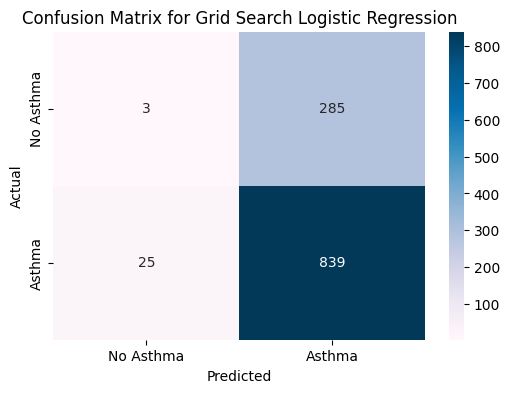

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

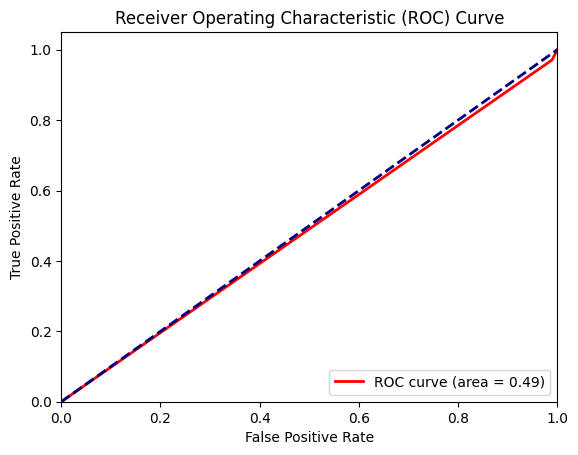

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

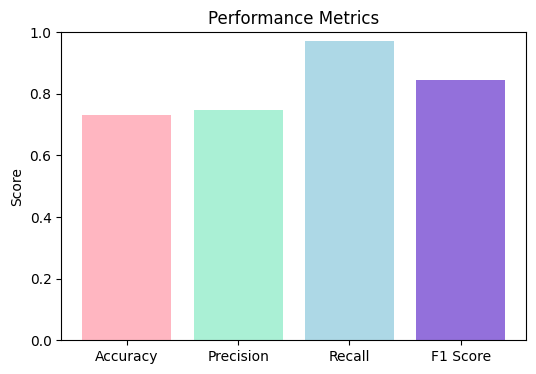

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Algorithms with best Parameters

# Best Parameters for XGBoost

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.6,
    scale_pos_weight=5,
    reg_lambda=1,
    reg_alpha=10,
    n_estimators=100,
    min_child_weight=5,
    max_depth=6,
    learning_rate=0.01,
    gamma=0.5,
    colsample_bytree=0.6,
    colsample_bynode=0.7,
    colsample_bylevel=0.7
)

xgb_model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7500
Precision: 0.7500
Recall: 1.0000
F1 Score: 0.8571
AUC-ROC Score: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       288
           1       0.75      1.00      0.86       864

    accuracy                           0.75      1152
   macro avg       0.38      0.50      0.43      1152
weighted avg       0.56      0.75      0.64      1152



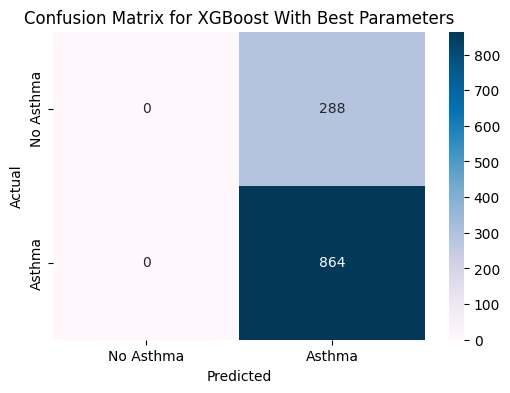

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for XGBoost With Best Parameters')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

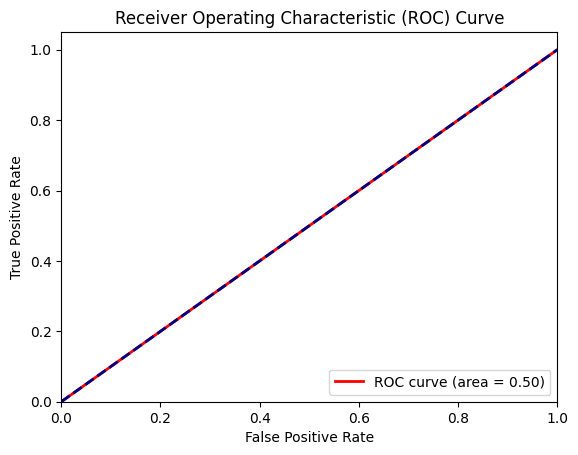

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

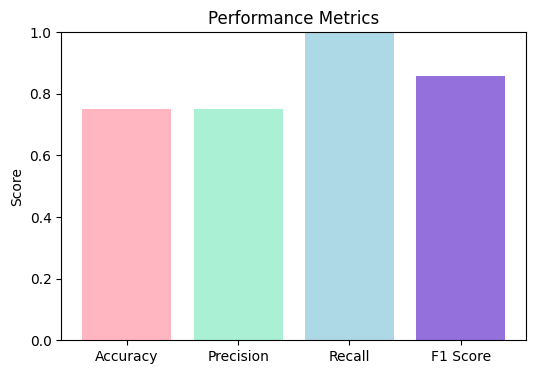

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Best Parameters For Logistic Regression

In [ ]:
logreg_model = LogisticRegression(
    random_state=42,
    tol=0.001,
    solver='sag',
    penalty='l2',
    multi_class='auto',
    max_iter=100,
    l1_ratio=0.1111111111111111,
    fit_intercept=False,
    dual=False,
    class_weight=None,
    C=0.00026366508987303583
)

logreg_model.fit(X_train_smote, y_train_smote)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7309
Precision: 0.7464
Recall: 0.9711
F1 Score: 0.8441
AUC-ROC Score: 0.4907

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.01      0.02       288
           1       0.75      0.97      0.84       864

    accuracy                           0.73      1152
   macro avg       0.43      0.49      0.43      1152
weighted avg       0.59      0.73      0.64      1152



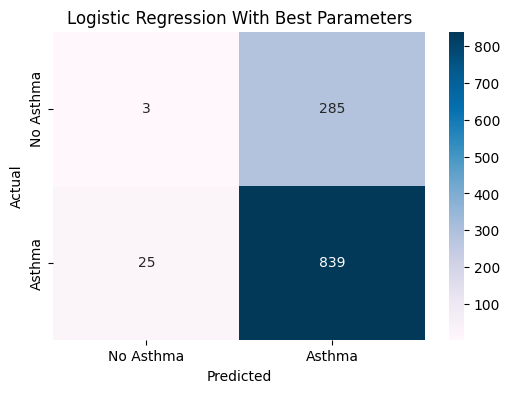

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Logistic Regression With Best Parameters')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

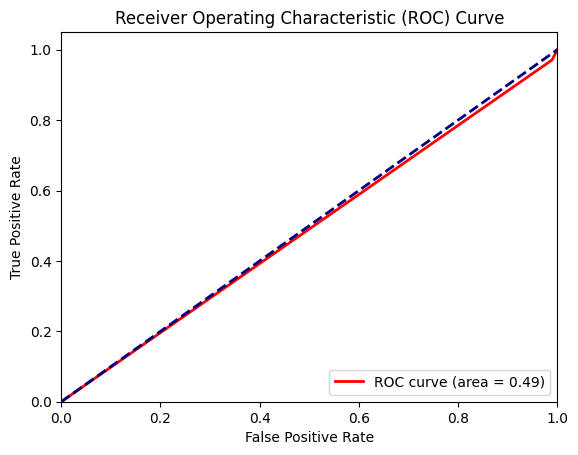

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

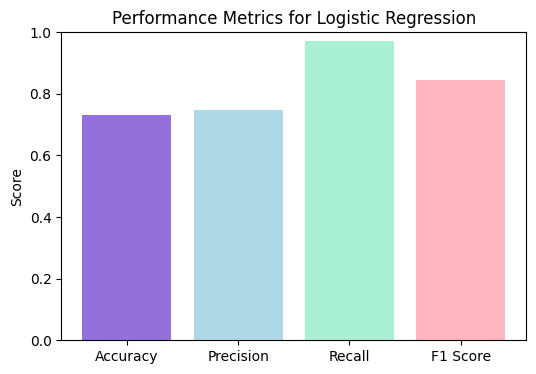

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['#9370DB', 'lightblue', '#AAF0D5', 'lightpink'])
plt.ylim(0, 1)
plt.title('Performance Metrics for Logistic Regression')
plt.ylabel('Score')
plt.show()

# Neural Network

In [ ]:
mlpc_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    max_iter=200,
    random_state=42,
)

mlpc_model.fit(X_train_smote, y_train_smote)

y_pred = mlpc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4184
Precision: 0.5006
Recall: 0.4184
F1 Score: 0.4529
AUC-ROC Score: 0.3229

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.13      0.10       288
           1       0.64      0.51      0.57       864

    accuracy                           0.42      1152
   macro avg       0.36      0.32      0.34      1152
weighted avg       0.50      0.42      0.45      1152



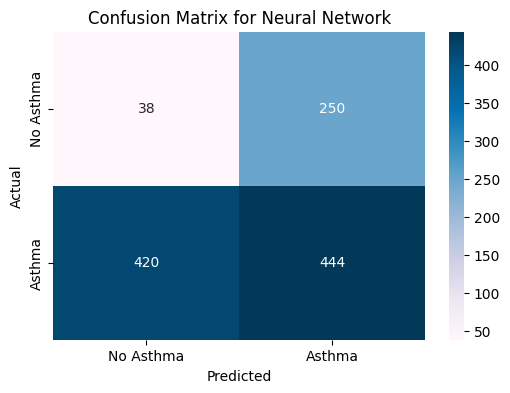

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

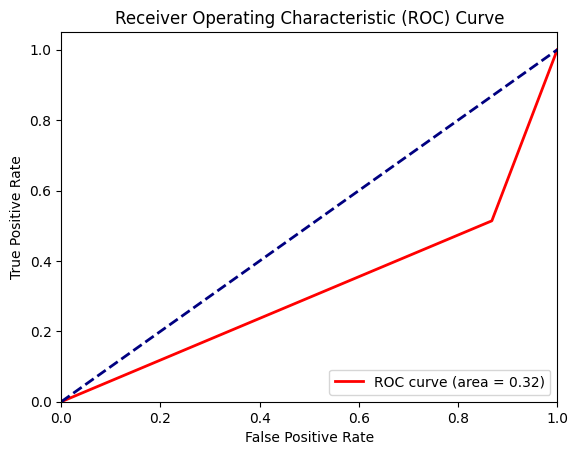

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

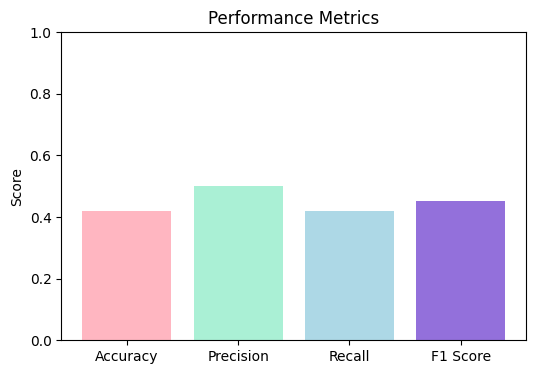

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Grid Search for Neural Network

In [ ]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': np.logspace(-4, -1, 6),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
    'batch_size': [32, 64, 128],
}

mlpc = MLPClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=mlpc,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Random Search:", random_search.best_params_)

best_mlpc_model = random_search.best_estimator_

y_pred = best_mlpc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters from Random Search: {'solver': 'sgd', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'batch_size': 64, 'alpha': 0.1, 'activation': 'tanh'}
Accuracy: 0.5451
Precision: 0.6088
Recall: 0.5451
F1 Score: 0.5699
AUC-ROC Score: 0.4769

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.34      0.27       288
           1       0.74      0.61      0.67       864

    accuracy                           0.55      1152
   macro avg       0.48      0.48      0.47      1152
weighted avg       0.61      0.55      0.57      1152



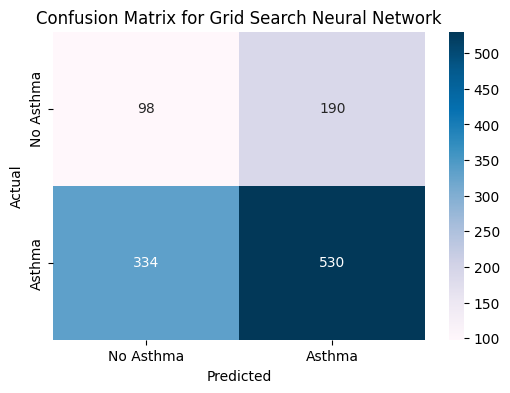

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Grid Search Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

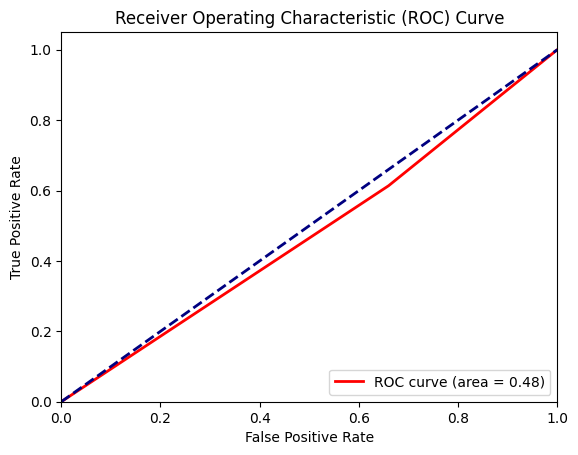

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

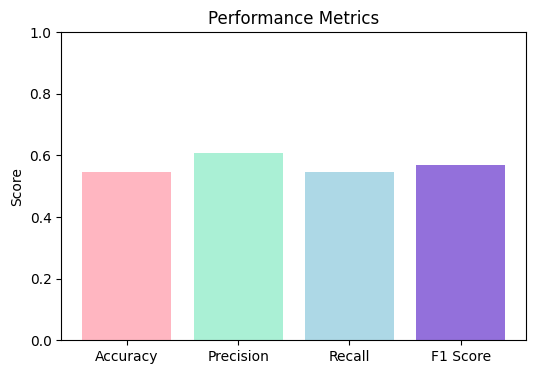

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

# Stacking Ensemble with Multiple Algorithms

In [ ]:
logreg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

stacking_clf = StackingClassifier(
    estimators=[                        #Base Models
        ('logreg', logreg_model),
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('knn', knn_model)
    ],
    final_estimator=SVC(probability=True), # Meta-model
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8898
Precision: 0.9382
Recall: 0.9132
F1 Score: 0.9255
AUC-ROC Score: 0.8663

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       288
           1       0.94      0.91      0.93       864

    accuracy                           0.89      1152
   macro avg       0.85      0.87      0.86      1152
weighted avg       0.89      0.89      0.89      1152



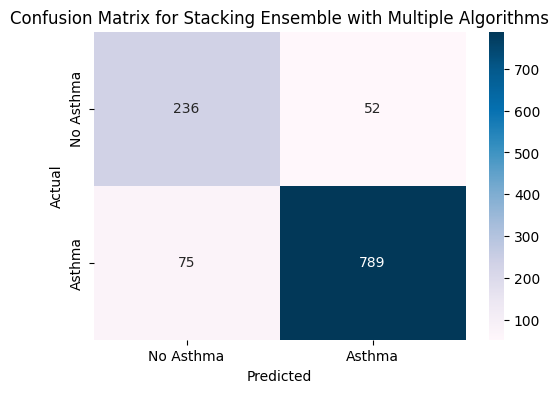

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', xticklabels=['No Asthma', 'Asthma'], yticklabels=['No Asthma', 'Asthma'])
plt.title('Confusion Matrix for Stacking Ensemble with Multiple Algorithms')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

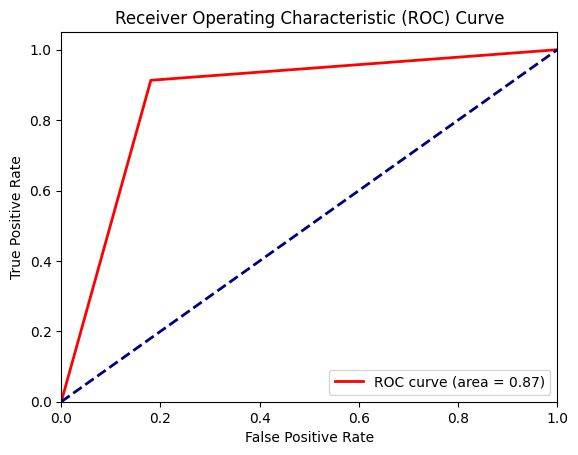

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

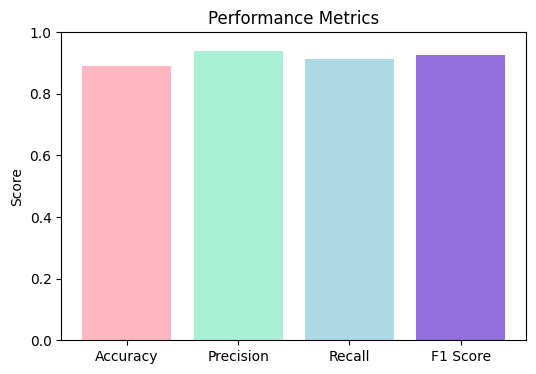

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['lightpink', '#AAF0D5', 'lightblue', '#9370DB'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()